<a href="https://colab.research.google.com/github/vendo495/projects/blob/main/facial_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [ ]:
# Load dataset
data = np.load('ORL_faces.npz')
data_keys = list(data.keys())
data_keys


['testY', 'testX', 'trainX', 'trainY']

In [ ]:
X_train = data['trainX']
y_train = data['trainY']
X_test = data['testX']
y_test = data['testY']

# Normalize the images
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((240, 10304), (240,), (160, 10304), (160,))

In [ ]:
# Reshape the images to their original size for the CNN
X_train = X_train.reshape(-1, 112, 92, 1)
X_test = X_test.reshape(-1, 112, 92, 1)

X_train.shape, X_test.shape


((240, 112, 92, 1), (160, 112, 92, 1))

In [ ]:
# Build the CNN model
model = Sequential()

# Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(112, 92, 1)))
model.add(MaxPooling2D((2, 2)))

# Pooling Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(40, activation='softmax'))  # 40 classes for 40 people

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 110, 90, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 45, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 53, 43, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 21, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 34944)             0         
                                                                 
 dense (Dense)               (None, 128)               4

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
8/8 [==============================] - 7s 616ms/step - loss: 3.5145 - accuracy: 0.0583 - val_loss: 3.1304 - val_accuracy: 0.0688
Epoch 2/50
8/8 [==============================] - 4s 524ms/step - loss: 2.8602 - accuracy: 0.1917 - val_loss: 2.5028 - val_accuracy: 0.2125
Epoch 3/50
8/8 [==============================] - 5s 718ms/step - loss: 1.9949 - accuracy: 0.5167 - val_loss: 1.6624 - val_accuracy: 0.5938
Epoch 4/50
8/8 [==============================] - 4s 506ms/step - loss: 1.0339 - accuracy: 0.8208 - val_loss: 1.1093 - val_accuracy: 0.7063
Epoch 5/50
8/8 [==============================] - 4s 521ms/step - loss: 0.5300 - accuracy: 0.8583 - val_loss: 0.6086 - val_accuracy: 0.8313
Epoch 6/50
8/8 [==============================] - 6s 851ms/step - loss: 0.1744 - accuracy: 0.9667 - val_loss: 0.3805 - val_accuracy: 0.9312
Epoch 7/50
8/8 [==============================] - 4s 528ms/step - loss: 0.0553 - accuracy: 0.9917 - val_loss: 0.2975 - val_accuracy: 0.9375
Epoch 8/50
8/8 [====

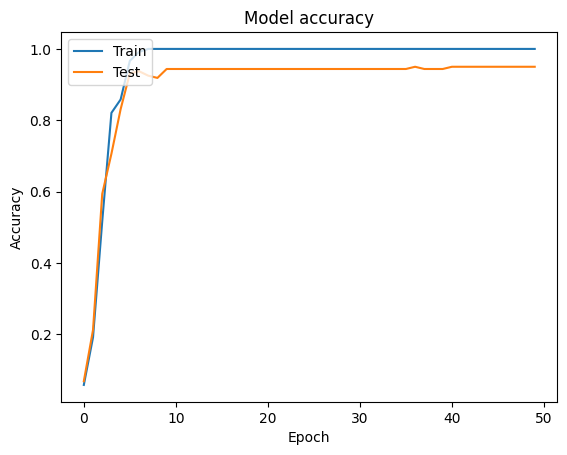

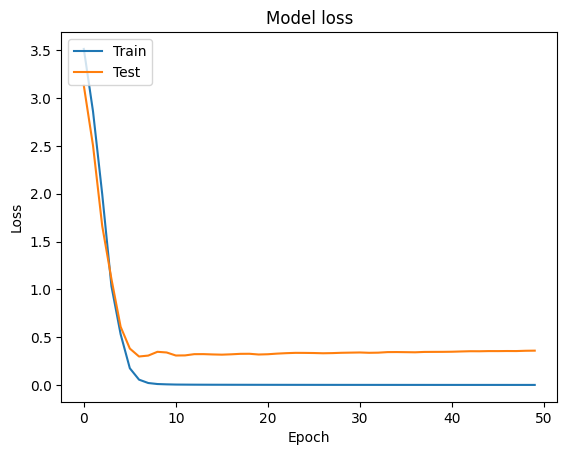

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
